In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
naive_bayes_db = pd.read_csv('df_with_transformed_time.csv', index_col=False)

In [3]:
naive_bayes_db.head()

,landing_safety,year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,durationInSeconds,LocationLat,LocationLng
0,green,2016,0.5,0.866025,0.937752,0.347305,-0.866025,-5.000000e-01,4800.0,38.0972,-106.1689
1,green,2016,0.5,0.866025,0.937752,0.347305,-0.707107,7.071068e-01,2400.0,38.0972,-106.1689
2,green,2016,0.5,0.866025,0.937752,0.347305,-0.500000,8.660254e-01,34800.0,38.0972,-106.1689
3,green,2016,0.5,0.866025,0.988468,0.151428,-0.500000,8.660254e-01,1200.0,38.0972,-106.1689
4,green,2016,0.5,0.866025,0.998717,-0.050649,1.000000,6.123234e-17,7200.0,38.0972,-106.1689


In [4]:
len(naive_bayes_db[naive_bayes_db.landing_safety == "red"])

1151819

In [5]:
len(naive_bayes_db[naive_bayes_db.landing_safety == "yellow"])

589361

In [6]:
len(naive_bayes_db[naive_bayes_db.landing_safety == "green"])

4385486

In [7]:
naive_bayes_db.skew()

C:\Users\danko\AppData\Local\Temp/ipykernel_2668/2916665166.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  naive_bayes_db.skew()


year                  -0.021776
month_sin             -0.123336
month_cos             -0.107608
day_sin                0.001799
day_cos                0.040680
hour_sin              -0.067007
hour_cos              -0.002930
durationInSeconds    633.432600
LocationLat           -0.234056
LocationLng           -0.735722
dtype: float64

In [8]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Distribution of year')

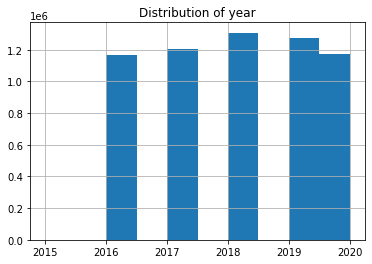

In [9]:
naive_bayes_db.year.hist()
plt.title('Distribution of year')

Text(0.5, 1.0, 'Distribution of month_sin')

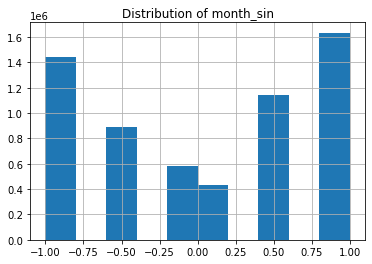

In [10]:
naive_bayes_db.month_sin.hist()
plt.title('Distribution of month_sin')

Text(0.5, 1.0, 'Distribution of month_cos')

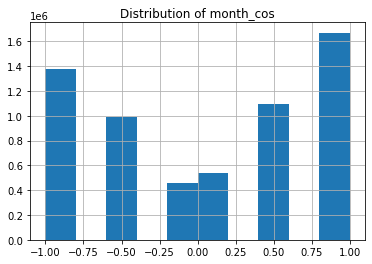

In [11]:
naive_bayes_db.month_cos.hist()
plt.title('Distribution of month_cos')

Text(0.5, 1.0, 'Distribution of day_sin')

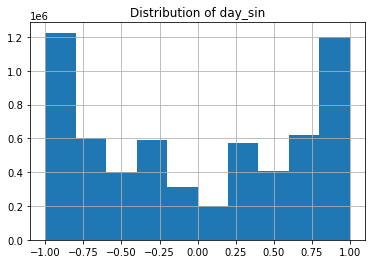

In [12]:
naive_bayes_db.day_sin.hist()
plt.title('Distribution of day_sin')

Text(0.5, 1.0, 'Distribution of day_cos')

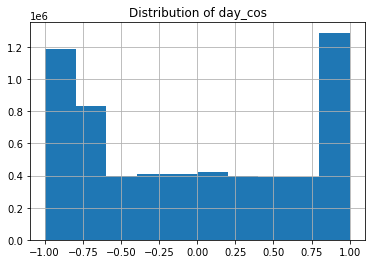

In [13]:
naive_bayes_db.day_cos.hist()
plt.title('Distribution of day_cos')

Text(0.5, 1.0, 'Distribution of hour_sin')

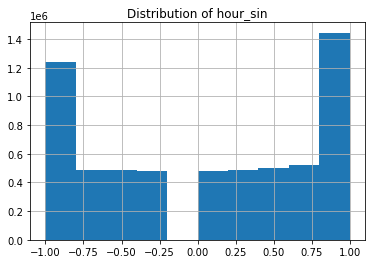

In [14]:
naive_bayes_db.hour_sin.hist()
plt.title('Distribution of hour_sin')

Text(0.5, 1.0, 'Distribution of hour_cos')

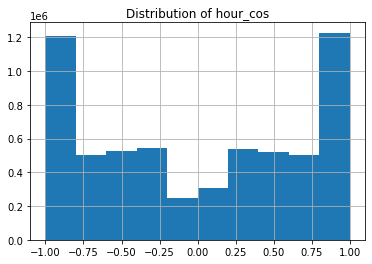

In [15]:
naive_bayes_db.hour_cos.hist()
plt.title('Distribution of hour_cos')

Text(0.5, 1.0, 'Distribution of durationInSeconds')

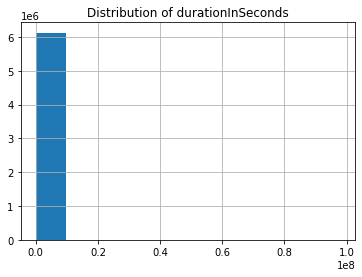

In [16]:
naive_bayes_db.durationInSeconds.hist()
plt.title('Distribution of durationInSeconds')

Text(0.5, 1.0, 'Distribution of locationLat')

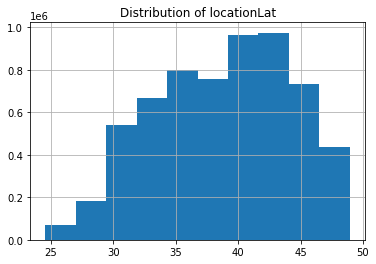

In [17]:
naive_bayes_db.LocationLat.hist()
plt.title('Distribution of locationLat')

Text(0.5, 1.0, 'Distribution of locationLng')

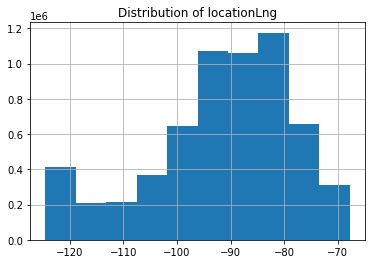

In [18]:
naive_bayes_db.LocationLng.hist()
plt.title('Distribution of locationLng')

In [19]:
def normality(data):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data)
    plt.subplot(1,2,2)
    stats.probplot(data,plot=pylab)
    plt.show()

In [20]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pylab

In [21]:
naive_bayes_db[naive_bayes_db.durationInSeconds == 0].count()

landing_safety       89
year                 89
month_sin            89
month_cos            89
day_sin              89
day_cos              89
hour_sin             89
hour_cos             89
durationInSeconds    89
LocationLat          89
LocationLng          89
dtype: int64

In [22]:
naive_bayes_db.loc[naive_bayes_db.durationInSeconds == 0, "durationInSeconds"] = 1

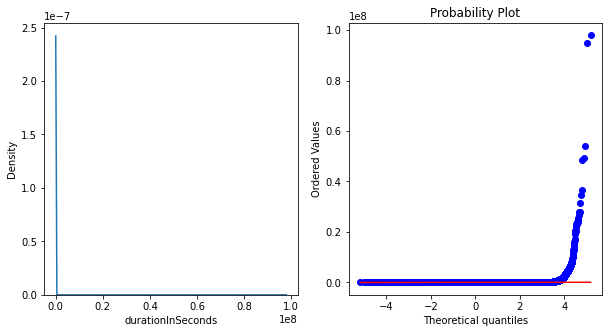

In [23]:
normality(naive_bayes_db.durationInSeconds)

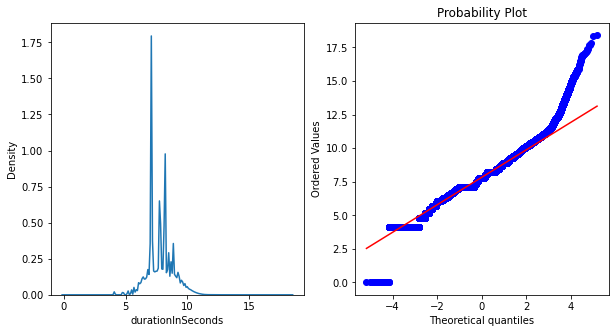

In [24]:
durationInSeconds_log=np.log(naive_bayes_db.durationInSeconds)
normality(durationInSeconds_log)

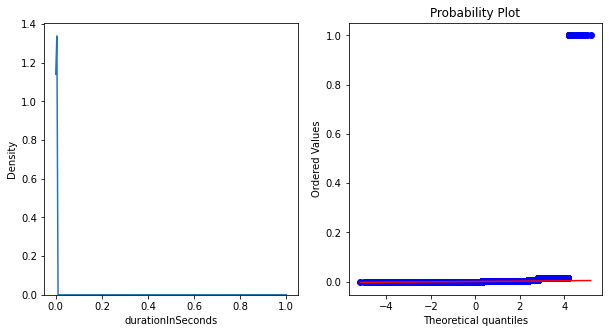

In [25]:
durationInSeconds_rec = 1/ naive_bayes_db.durationInSeconds
normality(durationInSeconds_rec)

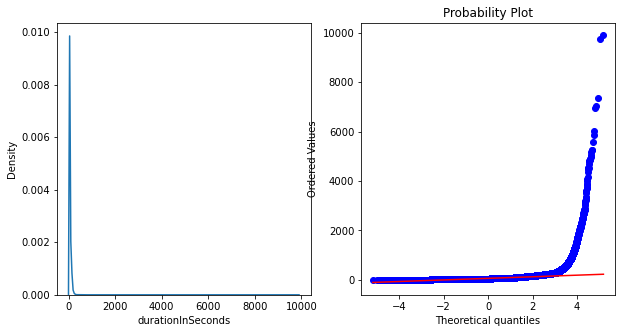

In [26]:
durationInSeconds_sqrt=np.sqrt(naive_bayes_db.durationInSeconds)
normality(durationInSeconds_sqrt)

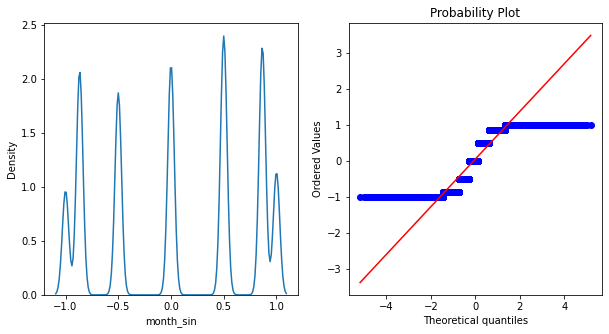

In [27]:
normality(naive_bayes_db.month_sin)

Text(0.5, 1.0, 'Distribution of durationInSeconds after log')

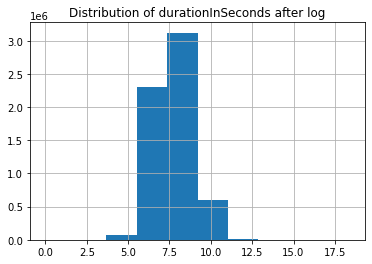

In [70]:
durationInSeconds_log.hist()
plt.title('Distribution of durationInSeconds after log')

In [28]:
durationInSeconds_log.skew()

0.30337121669899625

In [29]:
durationInSeconds_rec.skew()

233.2865058317264

In [30]:
durationInSeconds_sqrt.skew()

21.745606959855564

In [31]:
naive_bayes_db.durationInSeconds = durationInSeconds_log

In [32]:
from sklearn.preprocessing import QuantileTransformer

In [33]:
qt = QuantileTransformer(output_distribution="normal", random_state=1)

In [34]:
quantile_normal = qt.fit_transform(naive_bayes_db[['month_sin','month_cos','day_sin','day_cos', 'hour_sin','hour_cos']])

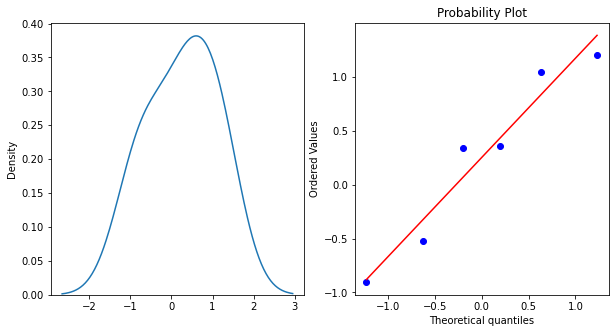

In [35]:
normality(quantile_normal[0])

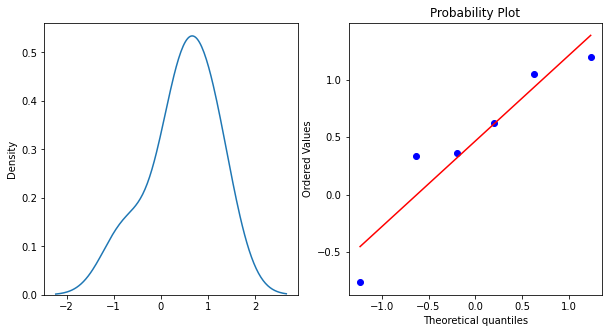

In [36]:
normality(quantile_normal[1])

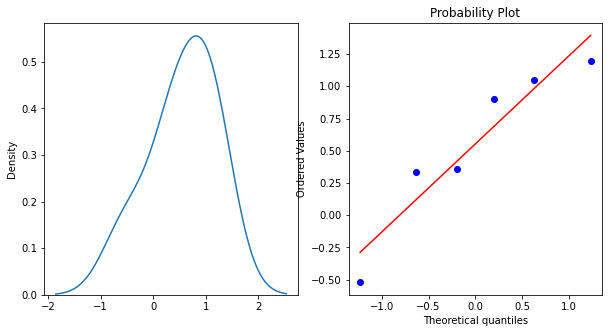

In [37]:
normality(quantile_normal[2])

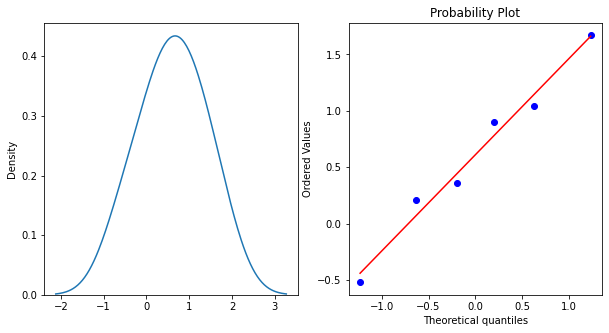

In [38]:
normality(quantile_normal[3])

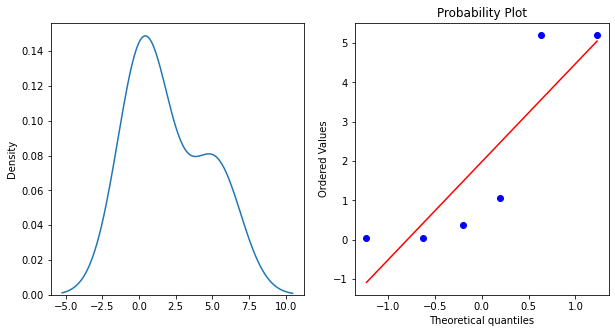

In [39]:
normality(quantile_normal[4])

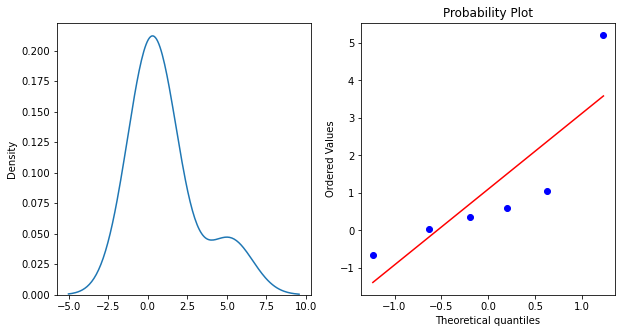

In [40]:
normality(quantile_normal[5])

In [41]:
df_normal = pd.DataFrame(quantile_normal, columns = ['month_sin','month_cos','day_sin','day_cos', 'hour_sin','hour_cos'])

In [42]:
naive_bayes_db[['month_sin','month_cos','day_sin','day_cos', 'hour_sin','hour_cos']]= df_normal

In [43]:
naive_bayes_db.head()

,landing_safety,year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,durationInSeconds,LocationLat,LocationLng
0,green,2016,0.360172,1.046576,1.197193,0.337506,-0.907080,-0.526417,8.476371,38.0972,-106.1689
1,green,2016,0.360172,1.046576,1.197193,0.337506,-0.764710,0.622621,7.783224,38.0972,-106.1689
2,green,2016,0.360172,1.046576,1.197193,0.337506,-0.522099,0.899534,10.457373,38.0972,-106.1689
3,green,2016,0.360172,1.046576,1.669112,0.209787,-0.522099,0.899534,7.090077,38.0972,-106.1689
4,green,2016,0.360172,1.046576,5.199338,0.036391,5.199338,0.045180,8.881836,38.0972,-106.1689


Kreiramo pocetni model sa svim atributima

In [45]:
X = naive_bayes_db.values[:, [1,2,3,4,5,6,7,8,9,10]]
Y = naive_bayes_db.values[:, 0]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [47]:
clf = GaussianNB().fit(X_train, y_train)

In [48]:
predictions = clf.predict(X_test)

In [49]:
print(metrics.classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

       green       0.72      0.97      0.83   1316493
         red       0.35      0.07      0.11    345387
      yellow       0.00      0.00      0.00    176120

    accuracy                           0.71   1838000
   macro avg       0.36      0.35      0.31   1838000
weighted avg       0.58      0.71      0.61   1838000



Kreiramo novi model bez atributa durationInSeconds

In [50]:
X1 = naive_bayes_db.values[:, [1,2,3,4,5,6,7,9,10]]
Y1 = naive_bayes_db.values[:, 0]

In [51]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 1)

In [52]:
clf1 = GaussianNB().fit(X1_train, y1_train)

In [53]:
predictions1 = clf1.predict(X1_test)

In [54]:
print(metrics.classification_report(y1_test, predictions1, zero_division=0))

              precision    recall  f1-score   support

       green       0.72      0.97      0.83   1316493
         red       0.35      0.06      0.10    345387
      yellow       0.00      0.00      0.00    176120

    accuracy                           0.71   1838000
   macro avg       0.36      0.35      0.31   1838000
weighted avg       0.58      0.71      0.61   1838000



Radimo down-sampling i kreiramo novi model sa balansiranim podacima

In [55]:
balanced_df = naive_bayes_db.groupby('landing_safety')
balanced_df = balanced_df.apply(lambda x: x.sample(balanced_df.size().min()).reset_index(drop=True))

In [56]:
X2 = balanced_df.values[:, [1,2,3,4,5,6,7,9,10]]
Y2 = balanced_df.values[:, 0]

In [57]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, random_state = 1)

In [58]:
clf2 = GaussianNB().fit(X2_train, y2_train)

In [59]:
predictions2 = clf2.predict(X2_test)

In [60]:
print(metrics.classification_report(y2_test, predictions2))

              precision    recall  f1-score   support

       green       0.40      0.41      0.41    177027
         red       0.49      0.50      0.49    176776
      yellow       0.44      0.41      0.43    176622

    accuracy                           0.44    530425
   macro avg       0.44      0.44      0.44    530425
weighted avg       0.44      0.44      0.44    530425



Text(0.5, 1.0, 'Distribution of hour_sin after transformation')

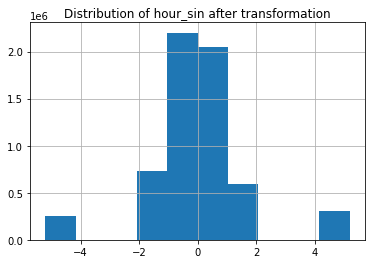

In [81]:
naive_bayes_db.hour_sin.hist()
plt.title('Distribution of hour_sin after transformation')

Text(0.5, 1.0, 'Distribution of hour_cos after transformation')

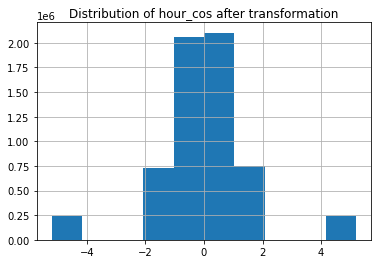

In [82]:
naive_bayes_db.hour_cos.hist()
plt.title('Distribution of hour_cos after transformation')

Text(0.5, 1.0, 'Distribution of day_sin after transformation')

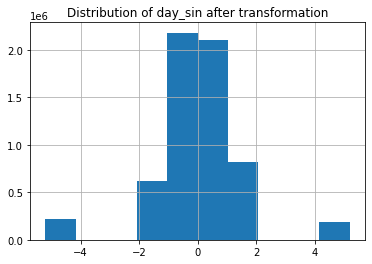

In [83]:
naive_bayes_db.day_sin.hist()
plt.title('Distribution of day_sin after transformation')

Text(0.5, 1.0, 'Distribution of day_cos after transformation')

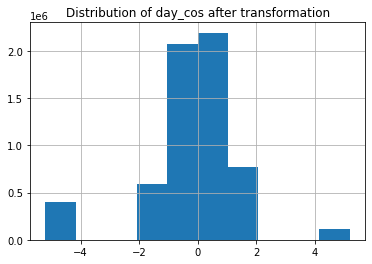

In [84]:
naive_bayes_db.day_cos.hist()
plt.title('Distribution of day_cos after transformation')

Text(0.5, 1.0, 'Distribution of month_sin after transformation')

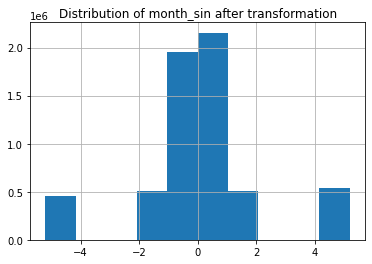

In [85]:
naive_bayes_db.month_sin.hist()
plt.title('Distribution of month_sin after transformation')

Text(0.5, 1.0, 'Distribution of month_cos after transformation')

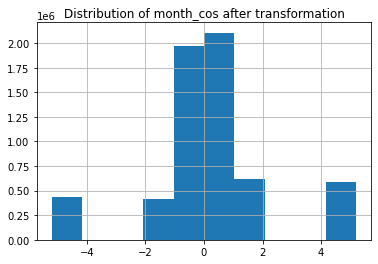

In [86]:
naive_bayes_db.month_cos.hist()
plt.title('Distribution of month_cos after transformation')